# Feed Forward Neural Networks

## Reading
1. Goodfellow. Deep Learning
1. https://pytorch.org/tutorials/
1. <del>How to Train Your Dragon</del>. https://myrtle.ai/how-to-train-your-resnet/

## Outline

1. General architecture
1. Neuron
1. Layers
1. Training
1. Activation functions
1. Weight Initialization
1. Optimization
1. Regularization
1. Universal Approximators

## 1 General Architecture

NN as a composition of functions

$$ F(x) = f_{w_n} \circ f_{w_{n-1}} \circ .. f_{w_1} (x) $$

<img src="images/ff.jpg" style="height:300px">

## 2 Neuron

$$ y = \sum_{i=1}^N f(w_ji x_i + b)$$

where  
$f$ - some non-linear **activation** function  
$w_i$ - learnable weights   
$b$ - learnable bias - usually incorporated into X     
$y$ - output of neuron  
$x$ - input of neuron  

<img src="images/neuron.png" style="height:300px">

## 3 Dense Layers

It's more convinient to express the same thing in vector form  

$$Y = f(XW)$$

where  
$X \in R^{NxD_1}$ - input of layer  
$Y \in R^{NxD_2}$ - output of layer  
$W \in R^{D_1 x D_2} $ - learnable weight matrix


<img src="images/weights.png" style="height:300px">

## 4 Training 

1. forward pass => compute loss 
1. backward pass => compute gradients on learnable weights
1. update weights according to your optimization algorithm

## 5 Activation fuctions

Why we do not use linear activations?

Activation functions supposed to be nice in the sense of gradient properties.

### Sigmoid 

$$\sigma(z) = \frac 1 {1 + \exp^{-z}}$$

* vanishing gradient
* bad output distribution

<img src="images/sigmoid.png" style="height:300px">


### Tanh

* vanishing gradient

<img src="images/tanh.jpg" style="height:300px">

### RELU

$$RELU(z) = \max(0, z)$$

* dead neurons if $z < 0$

<img src="images/sigmoid.png" style="height:300px">

### ELU

$ELU(z) = z$ if $z > 0$  
$ELU(z) = \alpha (\exp^z-1)$ if $z \leq 0 $  

* little longer computation than RELU

<img src="images/elu.png" style="height:300px">

## 6 Weight initialization

As we train out neural network with SGD, it is important to have good initial point to start.  
Usually use use:
1. uniform distribution in [-1,1]   
1. standart normal distribution  $N(0,1)$
1. xavier distribution (discuss later, in conv networks)  


* Why we use distributions centered around zero?  
* How it is connected with activation functions?  
* shared weights

## 7 Optimization


### Vanilla SGD

$\theta_0 \leftarrow $ init

for random batch on step $t$ = 1..max_iter:

$$ \theta_t = \theta_{t-1} - \alpha \nabla_{\theta} J(\theta_{t-1}) $$

$J$ - loss function  
$\theta_t$ - learnable parameters at step $t$  
$\alpha$ - learning rate  

* good theoretic properties
* slow convergence

<img src="images/sgd.gif" style="height:300px">


### SGD with momentum

$\theta_0 \leftarrow $ init  
$ m_0 \leftarrow  0$   

for random batch on step $t$ = 1..max_iter:

$$ m_t = \beta m_{t-1} + (1 - \beta)\nabla_{\theta} J(\theta_{t-1})$$
$$ \theta_t = \theta_{t-1} - \alpha m_t $$

where  
$m_t$ - accumulated gradient at step $t$   
$\beta$ - momentum parameter  


* Momentum cancels moves in "random" directions from stochastic nature of SGD
* Momentum ~ inertia

<img src="images/momentum.png" style="height:150px">


### RmsProp

$\theta_0 \leftarrow $ init  
$ v_0 \leftarrow  0$   

for random batch on step $t$ = 1..max_iter:

$$ g_t = \nabla_{\theta} J(\theta_{t-1}) $$
$$  v_t = \beta v_{t-1} + (1-\beta) g^2_t $$
$$  \theta_t = \theta_{t-1} - \frac {\alpha} {\sqrt {v_t} + \epsilon} g_t $$

where  
$v_t$ - accumulated squared components of gradient
$\beta$ - parameter  
$\epsilon << 1$ - to prevent division by zero 


* gradient direction carries more information than its norm  
* adjust gradient step size 


###  Adam

$\theta_0 \leftarrow $ init  
$ v_0 \leftarrow  0$ 
$ m_0 \leftarrow  0$ 

for random batch on step $t$ = 1..max_iter:


$$ g_t = \nabla_{\theta} J(\theta_{t-1}) $$

$$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $$
$$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g^2_t $$
$$ \hat m_t = \frac {m_t} {1 - \beta_1^t} $$
$$ \hat v_t = \frac {v_t} {1 - \beta_2^t}  $$
$$  \theta_t = \theta_{t-1} - \frac {\alpha} {\sqrt {\hat v_t} + \epsilon} \hat m_t $$

where  
$m_t$ - accumulated momentum
$v_t$ - accumulated squared components of gradient
$\beta_1, \beta_2$ - parameters  
$\epsilon << 1$ - to prevent division by zero 


* essentially SGD with momentum + RmsProp
* corrections for $\hat m_t, \hat v_t$ are to make first optimization steps more stable. Because the calculation of $ m_t, v_t$ can be seen as geometric series


<img src="images/comparison.gif" style="height:400px">

### Learning schedule

How to adjust gradient step size?

1. Reduce on plato by some factor  
1. Reduce on each iteration  
....  
find more variants in torch.optim.lr_schedule

## 8 Regularization in neural networks

Most popular:  
1. $L_2$ norm regularization through weight decay
1. Early stopping 
1. Data augmentation. Create new samples from the same domain to increase size of your dataset. Remember generalization bounds.  
1. Dropout. Drop random nodes in a layer with probability $p$    
1. Batch Normalization



### Dropout

Theere are 2 interpretations for dropout:  
1. "Bagging" over neural networks  
1. Avoid feature coadaptation  

Difference between bagging and dropout:

$$ p(y|x) = \frac 1 K \sum_{i=1}^K p_i(y|x)$$ for bagging  

$$ p(y|x) = \sum_{\mu} p(\mu) p(y | x, \mu)$$ for dropout, where $\mu$ is mask on weights. There is an exponential number of masks for fixed number of weights, that makes dropout more effective than explicit bagging.  


**On training**:  
On each batch randomly remove neurons in the previous layer with probability $p$.

**On inference**:  

Ideally, sample all $2^n$ dropped-out networks and average predictions.  
In practice, approximate by using the full network with each node's output weighted by a factor of $1-p$, so the expected value of the output of any node is the same as in the training stages.   
=> Although it effectively generates 2^{n} neural nets, but at test time only a single network needs to be tested.


<img src="images/drop.png" style="height:300px">

### Batch Normalization

**On training**:  

on every batch $t$:

$$ \mu_t = \frac 1 m \sum_{i=1}^m x_i $$
$$ \sigma^2_t = \frac 1 m \sum_{i=1}^m (x_i - \mu_t) $$
$$ \hat x_i = \frac {x_i - \mu_t} {\sigma_t + \epsilon} $$
$$ y_i = \gamma \hat x_i + \beta = BN_{\gamma, \beta}(x_i) $$

where  
$\mu_t$ - estimated batch mean  
$\sigma^2_t$ - estimated batch variance  
$\hat x_i$ - normalized input  
$\gamma$ - learnable scale parameter  
$\beta$ - learnable shift parameter  

**On inference** we can't compute $\mu_t, \sigma^2_t$. Instead, we use some running average over $\mu_t, \sigma^2_t$ that were observed during training.

* NN in theory can learn $\gamma, \beta$ to undo batch normalization. In practice, they usually don't
* BatchNorm stabilizes training by making surface of loss function more smooth



<img src="images/batchnorm.png" style="height:300px">

## Universal Appoximators

Universal Appoximation theorem
"Feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of $R^n$, under mild assumptions on the activation function"

### Shallow networks

Though we can approximate any function with just one hidden layer, it need needs exponential number of nodes in a layer

### Feature representation

In practice, features learned on deeper layers correspond to more abstract object attributes.  

In [1]:
## Demo1, MNIST

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm_notebook
from tensorboardX import SummaryWriter

In [2]:
class Demo1(nn.Module):
    
    def __init__(self, p):
        super(Demo1, self).__init__()
        self.drop = nn.Dropout(p)
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100,100)
        self.bn = nn.BatchNorm1d(100)
        
        # out dim = 10 because we have only 10 digits
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # 1st layer
        x = self.fc1(x)
        x = F.elu(x)
        x = self.fc2(x)
        # BatchNorm
        x = self.bn(x)
        x = F.elu(x)
        
        # dropout layer
        x = self.drop(x)
        
        # 2nd layer
        x = self.fc3(x)
        return x

In [11]:
def train_nn(model, train_loader, val_loader, n_batches, optimizer, criterion, n_epochs=20, 
             device=torch.device('cpu'),
             mu=0.9, 
             logdir=None,
             checkdir=None,
             reduce_lr_patience=2,
             verbose=True
            ):
    if logdir:
        sw = SummaryWriter(logdir)
    else:
        sw = None
        
    history = []
    
    if reduce_lr_patience > 0:
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=reduce_lr_patience, verbose=verbose)
    
    for epoch in range(n_epochs):
        
        # training mode
        model.train()
        running_loss = 0
        
        if verbose:
            batch_iter = tqdm_notebook(enumerate(train_loader), total=n_batches, desc='epoch %d' % (epoch + 1), leave=True)
        else:
            batch_iter = enumerate(train_loader)
            
        for i, (X, y) in batch_iter:
            
            X = X.to(device)
            y = y.to(device)
            
            optimizer.zero_grad()
            
            prediction = model(X)
            
            loss = criterion(prediction, y)
            
            loss.backward()
            optimizer.step()
            
            current_loss = loss.data.detach().item()
            # smooth loss
            running_loss = running_loss * mu + current_loss * (1-mu)
            
            if verbose:
                batch_iter.set_postfix(loss='%.4f' % running_loss)
                
            niter = epoch * n_batches + i
            
            if sw:
                sw.add_scalar('Train/Loss', current_loss, niter)
                
                
        # validation mode 
        model.eval()
        val_loss = []

        with torch.no_grad():
            for X, y in val_loader:
                X = X.to(device)
                y = y.to(device)

                prediction = model(X)
                loss = criterion(prediction, y)
                loss = loss.data.detach().item()
                val_loss.append( loss )

        val_loss = np.mean(val_loss)

        if verbose:
            print('validation loss=%.4f' % val_loss)

        if sw:
            sw.add_scalar('Validation/Loss', val_loss, epoch)

        if reduce_lr_patience > 0:
            scheduler.step(val_loss)

        if checkdir:
            torch.save(model.state_dict(), checkdir + '/epoch_%d_val_loss_%f' % (epoch, val_loss))


        history.append({
            'epoch': epoch,
            'train_loss': running_loss,
            'val_loss': val_loss,
        })

    return pd.DataFrame(history)

In [18]:
batch_size = 128

train_loader = DataLoader(
    datasets.MNIST('./', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)


val_loader = DataLoader(
    datasets.MNIST('./', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=False)

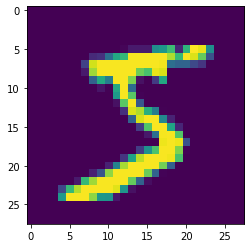

In [19]:
sample = train_loader.dataset[0][0]
sample = np.squeeze(sample)
plt.imshow(sample)

In [20]:
dropout_rate = 0.1

device = torch.device('cpu')

model = Demo1(dropout_rate).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = nn.CrossEntropyLoss()

n_batches = int(np.ceil(len(train_loader.dataset) / batch_size))

In [21]:
!rm -rf log_demo1
!rm -rf check_demo1
!mkdir check_demo1

In [22]:
train_nn(model, train_loader, val_loader, n_batches, optimizer, criterion, 
         n_epochs=10,
         device=device,
         logdir='log_demo1',
         checkdir='check_demo1',
        )

/Users/denaas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



validation loss=0.2200



validation loss=0.1506



validation loss=0.1188



validation loss=0.1053



validation loss=0.0918



validation loss=0.0881



validation loss=0.0838



validation loss=0.0798



validation loss=0.0755



validation loss=0.0746


,epoch,train_loss,val_loss
0,0,0.266547,0.219966
1,1,0.181055,0.150640
2,2,0.139798,0.118827
3,3,0.112262,0.105270
4,4,0.092133,0.091781
5,5,0.086446,0.088132
6,6,0.079673,0.083788
7,7,0.070641,0.079781
8,8,0.064878,0.075453
9,9,0.064865,0.074618
